In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from devkit.ml import ComputeResourceLog
from time import sleep

In [3]:
cglog = ComputeResourceLog(0.5)
cglog.start()
for i in range(3):
    sleep(20)
    cglog.log_event(f"event {i}")
sleep(20)
cglog.stop()

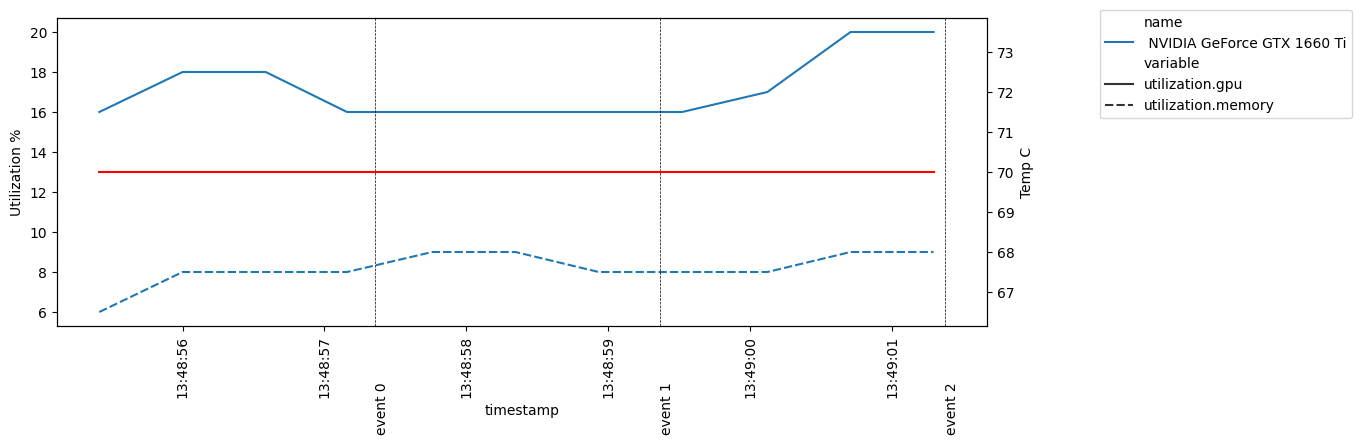

In [4]:
cglog.gpu_plot()

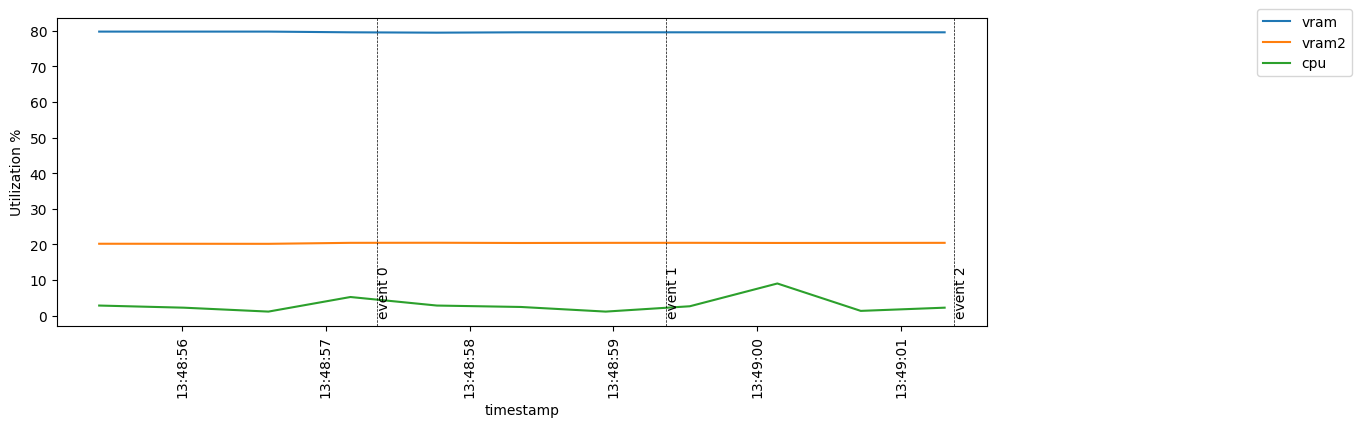

In [5]:
cglog.cpu_plot()